In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb


bn = gum.BayesNet('Appropriate Robot Intent')

user_intent = bn.add(gum.LabelizedVariable('user_intent', 'User Intent', ['information_request', 'opinion_expression']))
discourse_state = bn.add(gum.LabelizedVariable('discourse_state', 'Discourse State', ['previous_topic', 'new_topic']))
user_preference = bn.add(gum.LabelizedVariable('user_preference', 'User Preference', ['long_statements', 'short_statements']))
robot_intent = bn.add(gum.LabelizedVariable('robot_intent', 'Robot Intent', ['acknowledge', 'provide_statement']))
robot_revised_intent = bn.add(gum.LabelizedVariable('robot_revised_intent', 'Robot Revised Intent', ['acknowledge_short','acknowledge_long','provide_statement_short','provide_statement_long']))

bn.addArc(user_intent,robot_intent)
bn.addArc(discourse_state,robot_intent)
bn.addArc(user_preference,robot_revised_intent)
bn.addArc(robot_intent,robot_revised_intent)

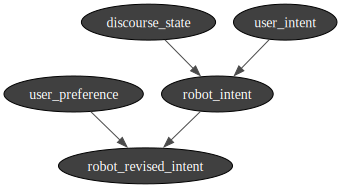

In [3]:
gnb.showBN(bn,size='30')

In [4]:
bn.cpt(user_intent).fillWith([0.3,0.7])
bn.cpt(user_intent)

(pyAgrum.Potential<double>@0x107f0b8e0) 
  user_intent      |
informati|opinion_e|
---------|---------|
 0.3000  | 0.7000  |

In [5]:
bn.cpt(discourse_state).fillWith([0.8,0.2])
bn.cpt(discourse_state)

(pyAgrum.Potential<double>@0x107f0e0c0) 
  discourse_state  |
previous_|new_topic|
---------|---------|
 0.8000  | 0.2000  |

In [6]:
bn.cpt(user_preference).fillWith([0.4,0.6])
bn.cpt(user_preference)

(pyAgrum.Potential<double>@0x1041b3ea0) 
  user_preference  |
long_stat|short_sta|
---------|---------|
 0.4000  | 0.6000  |

In [7]:
bn.cpt(robot_intent)[{"user_intent": "information_request", "discourse_state": "previous_topic"}] = [0.0, 1.0]
bn.cpt(robot_intent)[{"user_intent": "opinion_expression", "discourse_state": "previous_topic"}] = [0.9, 0.1]
bn.cpt(robot_intent)[{"user_intent": "information_request", "discourse_state": "new_topic"}] = [0.0, 1.0]
bn.cpt(robot_intent)[{"user_intent": "opinion_expression", "discourse_state": "new_topic"}] = [0.7, 0.3]

bn.cpt(robot_intent)

(pyAgrum.Potential<double>@0x104c55100) 
             ||  robot_intent     |
user_i|discou||acknowled|provide_s|
------|------||---------|---------|
inform|previo|| 0.0000  | 1.0000  |
opinio|previo|| 0.9000  | 0.1000  |
inform|new_to|| 0.0000  | 1.0000  |
opinio|new_to|| 0.7000  | 0.3000  |

In [8]:
bn.cpt(robot_revised_intent)[{"robot_intent": "acknowledge", "user_preference": "long_statements"}] = [0.1, 0.9, 0.0, 0.0]
bn.cpt(robot_revised_intent)[{"robot_intent": "acknowledge", "user_preference": "short_statements"}] = [0.9, 0.1, 0.0, 0.0]
bn.cpt(robot_revised_intent)[{"robot_intent": "provide_statement", "user_preference": "long_statements"}] = [0.0, 0.0, 0.1, 0.9]
bn.cpt(robot_revised_intent)[{"robot_intent": "provide_statement", "user_preference": "short_statements"}] = [0.0, 0.0, 0.9, 0.1]


bn.cpt(robot_revised_intent)

(pyAgrum.Potential<double>@0x104c9af60) 
             ||  robot_revised_intent                 |
user_p|robot_||acknowled|acknowled|provide_s|provide_s|
------|------||---------|---------|---------|---------|
long_s|acknow|| 0.1000  | 0.9000  | 0.0000  | 0.0000  |
short_|acknow|| 0.9000  | 0.1000  | 0.0000  | 0.0000  |
long_s|provid|| 0.0000  | 0.0000  | 0.1000  | 0.9000  |
short_|provid|| 0.0000  | 0.0000  | 0.9000  | 0.1000  |

In [10]:
ie = gum.LazyPropagation(bn)
ie.setEvidence({'user_intent': 'information_request', 'user_preference': 'long_statements'})
ie.makeInference()
prob = ie.posterior(robot_intent)
print(prob)
print(f"P(robot_intent = acknowledge | user_intent = information_request, user_preference = long_statements) = {prob[{'robot_intent': 'acknowledge'}]}")

ie.setEvidence({'user_intent': 'information_request', 'user_preference': 'long_statements', 'discourse_state': 'new_topic'})
ie.makeInference()
prob = ie.posterior(robot_intent)
print(f"P(robot_intent = acknowledge | user_intent = information_request, user_preference = long_statements, discourse_state = new_topic) = {prob[{'robot_intent': 'acknowledge'}]}")




  robot_intent     |
acknowled|provide_s|
---------|---------|
 0.0000  | 1.0000  |

P(robot_intent = acknowledge | user_intent = information_request, user_preference = long_statements) = 0.0
P(robot_intent = acknowledge | user_intent = information_request, user_preference = long_statements, discourse_state = new_topic) = 0.0
